In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from analysis.common.analysis.postprocessing import plot_sensitivity as ps
%matplotlib inline
from pisa import ureg
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

<< PISA_TARGET env var is defined as: "cpu"; PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
from collections import OrderedDict
from cycler import cycler
from matplotlib import colors
# colorblind-friendly colormap see https://yoshke.org/blog/essays/2020/07/colorblind-friendly-diagrams/
COLORS = OrderedDict(
    orange=(230/255, 159/255, 0),
    sky_blue=(86/255, 180/255, 233/255),
    #reddish_purple=(204/255, 121/255, 167/255),
    vermillon=(213/255, 94/255, 0),
    bluish_green=(0, 158/255, 115/255),
    blue=(0, 114/255, 178/255),
    reddish_purple=(204/255, 121/255, 167/255),
    yellow=(240/255, 228/255, 66/255),
    black=(0, 0, 0),
)
color_cycler = cycler(color=list(COLORS.values()))
plt.rc('axes', prop_cycle=color_cycler)

## Standard Osc Contours

In [3]:
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/free_detsys/standard_osc/sensitivity_test/asimov/"
metadata, results = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=False,
    dm32=True,
    sin2_theta23=True,
)

Opening file : /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/free_detsys/standard_osc/sensitivity_test/asimov/oscNext_standard_osc_sensitivity_test-sensitivity_test-000899.json.bz2
Found test results :
  Directory          : /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/free_detsys/standard_osc/sensitivity_test/asimov
  Test type          : sensitivity_test
  Num files found    : 900
  Num files opened   : 900
Input test data file contents : ['test_name', 'data', 'free_fit', 'scan', 'metadata']
[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/fridge3/lib/python3.6/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)

Found (at least some) data for 1 trials of 1

Truth params :
  flux_table : flux/honda-2015-spl-solmin-aa.d
  energy_pivot : 24.0900951261 gigaelectron_volt
  delta_index : 0.0 dimensionles

In [4]:
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/fixed_detsys/standard_osc/sensitivity_test/asimov/"
metadata_fixed_detsys, results_fixed_detsys = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=False,
    dm32=True,
    sin2_theta23=True,
)

Opening file : /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/fixed_detsys/standard_osc/sensitivity_test/asimov/oscNext_standard_osc_sensitivity_test-sensitivity_test-000899.json.bz2
Found test results :
  Directory          : /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/standard_osc/fixed_detsys/standard_osc/sensitivity_test/asimov
  Test type          : sensitivity_test
  Num files found    : 900
  Num files opened   : 900
Input test data file contents : ['test_name', 'data', 'free_fit', 'scan', 'metadata']
Found (at least some) data for 1 trials of 1

Truth params :
  flux_table : flux/honda-2015-spl-solmin-aa.d
  energy_pivot : 24.0900951261 gigaelectron_volt
  delta_index : 0.0 dimensionless
  pion_ratio : 0.0 dimensionless
  barr_af_Pi : 0.0 dimensionless
  barr_g_Pi : 0.0 dimensionless
  barr_h_Pi : 0.0 dimensionless
  barr_i_Pi : 0.0 dimensionless
  barr_w_K : 0.0 dimensionless
  barr_x_K : 0.0 dimensionless
  barr_y_K : 0.0 dimensionles

free fit metric val: 2.9978249316388234e-07
free fit metric val: 4.204931323884511e-08


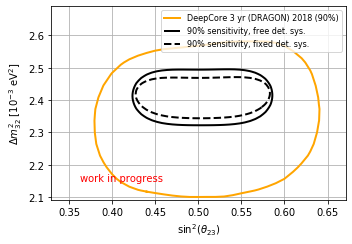

In [13]:
from matplotlib.colors import LogNorm, Normalize
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import matplotlib.tri as tri
from matplotlib import cm
from scipy import stats

from analysis.common.results.IceCube import (
    DeepCore_DRAGON__sin2_theta23_dm2_32__90pc_2018,
    DeepCore_GRECO__sin2_theta23_dm2_32__90pc_2019,
    DeepCore_oscNext_verification_sample__sin2_theta23_dm2_32__90pc_2020
)


mass_splitting_scale_factor = 1e3
mass_splitting_unit = r"[$10^{-3}$ eV$^2$]"

plt.figure(figsize=(5,3.5))

# Plot DRAGON
dragon_label = "DeepCore 3 yr (DRAGON) 2018 (90%)"
plt.plot(DeepCore_DRAGON__sin2_theta23_dm2_32__90pc_2018[:,0],
         DeepCore_DRAGON__sin2_theta23_dm2_32__90pc_2018[:,1]*mass_splitting_scale_factor,
         label=dragon_label, color="orange", linestyle="-", linewidth=2)

# Plot oscNext verification sample
oscNext_VS_label = "oscNext verification sample, 7.5 yr (90%)"
# plt.plot(DeepCore_oscNext_verification_sample__sin2_theta23_dm2_32__90pc_2020[:,0],
#          DeepCore_oscNext_verification_sample__sin2_theta23_dm2_32__90pc_2020[:,1]*mass_splitting_scale_factor,
#          label=oscNext_VS_label, color="red", linestyle="--", linewidth=3)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)

########## free detsys
trial_keys = list(results["trials"].keys())
# silly workaround because loading results from a file turns int keys
# into strings...
scan_metric = results["trials"][trial_keys[0]]["scan"]["metric_vals"]
free_metric = results["trials"][trial_keys[0]]["free_fit"]["metric_val"]
print(f"free fit metric val: {free_metric}")
mask = np.isfinite(scan_metric)
x = results["scan_grid"]["sin2_theta23"][mask]
y = results["scan_grid"]["deltam32"][mask] * mass_splitting_scale_factor
z = scan_metric[mask] - free_metric
# making one common triangle mesh for interpolation and contours...
points = np.vstack((x, y)).T
delaunay = Delaunay(points)
# a different object with the same triangles to make contours
triang = tri.Triangulation(x, y, delaunay.simplices)
# butter smooth contours!
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_refi = refiner.refine_field(z, subdiv=1)
CS = plt.tricontour(tri_refi, z_refi, levels=[level_90],
                    colors="k", linewidths=2, linestyles=["-"])
labels = [r"90% sensitivity, free det. sys."]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
    
########## free deltaCP24 w/o hypersurfaces
trial_keys = list(results_fixed_detsys["trials"].keys())
# silly workaround because loading results from a file turns int keys
# into strings...
scan_metric = results_fixed_detsys["trials"][trial_keys[0]]["scan"]["metric_vals"]
free_metric = results_fixed_detsys["trials"][trial_keys[0]]["free_fit"]["metric_val"]
print(f"free fit metric val: {free_metric}")
mask = np.isfinite(scan_metric)
x = results_fixed_detsys["scan_grid"]["sin2_theta23"][mask]
y = results_fixed_detsys["scan_grid"]["deltam32"][mask] * mass_splitting_scale_factor
z = scan_metric[mask] - free_metric
# making one common triangle mesh for interpolation and contours...
# working in log-space for x because the mesh is a mess otherwise
points = np.vstack((x, y)).T
delaunay = Delaunay(points)
# a different object with the same triangles to make contours
triang = tri.Triangulation(x, y, delaunay.simplices)
# butter smooth contours!
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_refi = refiner.refine_field(z, subdiv=1)

CS = plt.tricontour(tri_refi, z_refi, levels=[level_90],
                    colors="k", linewidths=2, linestyles=["--"])

labels = [r"90% sensitivity, fixed det. sys."]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

# plt.scatter(x, y, color="black", s=1)

# if np.sum(~mask) > 0:
#     plt.scatter(x_miss, y_miss, color="red", label="missing point", s=10)
# plt.xlim((1e-3, 0.5))
plt.ylim((2.09, 2.69))
# cbar = plt.colorbar(p)
# cbar.set_label(r"$\Delta\chi^2_{\mathrm{mod}}$")
# plt.semilogx()
plt.legend(fontsize=8, loc="upper right")
plt.xlabel(r"$\sin^2(\theta_{23})$")
plt.ylabel(r'$\Delta m^2_{32}$ %s' % mass_splitting_unit)
#plt.text(.1, .3, "no detector\nsystematics", color="red", transform=plt.gca().transAxes)
plt.text(.1, .1, "work in progress", color="red", transform=plt.gca().transAxes)
plt.grid()
plt.tight_layout()
plt.savefig("sensitivities/standard_osc_detsys_impact.pdf")

## Mixing Angle Contours

In [3]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_fixed_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "../analysis/test_hs_3D_cliprange/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/at_antares_2019_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/at_meows_ana1_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid_at_antares_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid_at_meows_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mixing_lowe_binning/sterile_mixing_angles/sensitivity_test/asimov/"

# for VLVnT:
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid/sterile_mixing_angles/sensitivity_test/asimov/"
metadata, results = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=True,
)

Loading parsed data from /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid/sterile_mixing_angles/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [4]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_fixed_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "../analysis/test_hs_3D_cliprange/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/at_antares_2019_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/at_meows_ana1_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid_at_antares_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/Utau4_loggrid_at_meows_bfp/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mixing_lowe_binning/sterile_mixing_angles/sensitivity_test/asimov/"

# for VLVnT:
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_fixed_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
metadata_fixed_dcp, results_fixed_dcp = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=True,
)

Loading parsed data from /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_fixed_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [4]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_free_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "../analysis/test_hs_3D_cliprange_fix_detsys/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mixing_lowe_binning/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/tracks_only_analysis/sterile_mixing_angles/sensitivity_test/asimov/"
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/2ch_high_pid/sterile_mixing_angles/sensitivity_test/asimov/"


metadata_2, results_2 = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), "sensitivity_test_parsed.json"),
    reparse=False,
    angles_to_mat_elem=True,
)

Loading parsed data from /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/2ch_high_pid/sterile_mixing_angles/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [7]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_free_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "../analysis/test_hs_3D_cliprange_fix_detsys/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mixing_lowe_binning/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/"
input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/"


metadata_3, results_3 = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=True,
)

Loading parsed data from /lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [ ]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/output_free_deltacp24_v1/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "../analysis/test_hs_3D_cliprange_fix_detsys/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mixing_lowe_binning/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/no_cascades/sterile_mixing_angles/sensitivity_test/asimov/"


# metadata_4, results_4 = ps.parse_sensitivity_test_data(
#     input_dir=os.path.abspath(input_dir),
#     num_files=None,
#     cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
#     reparse=False,
#     angles_to_mat_elem=True,
# )

In [5]:
def convert_matelem(sin2_2theta24, sin2_2theta34):
    th24 = 0.5*np.arcsin(np.sqrt(sin2_2theta24))
    th34 = 0.5*np.arcsin(np.sqrt(sin2_2theta34))
    u_mu4 = np.sin(th24)**2
    u_tau4 = np.sin(th34)**2 * np.cos(th24)**2
    return u_mu4, u_tau4

def matelem2angles(u_mu4, u_tau4):
    sin2_th24 = u_mu4
    cos2_th24 = 1 - sin2_th24
    sin2_th34 = u_tau4/cos2_th24
    th24 = np.arcsin(np.sqrt(sin2_th24))
    th34 = np.arcsin(np.sqrt(sin2_th34))
    return th24, th34

def angles2matelem(th24, th34):
    u_mu4 = np.sin(th24)**2
    u_tau4 = np.sin(th34)**2 * (1 - u_mu4)
    return u_mu4, u_tau4

In [9]:
from matplotlib.colors import LogNorm, Normalize
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import matplotlib.tri as tri
from matplotlib import cm
from scipy import stats

def plot_mixing_contours(results, levels, labels, colors, linestyles, linewidths=2, show_triang=False):
    trial_keys = list(results["trials"].keys())
    # silly workaround because loading results from a file turns int keys
    # into strings...
    scan_metric = results["trials"][trial_keys[0]]["scan"]["metric_vals"]
    free_metric = results["trials"][trial_keys[0]]["free_fit"]["metric_val"]
    print(f"free fit metric val: {free_metric}")

    x = results["scan_grid"]["u_mu4"]
    y = results["scan_grid"]["u_tau4"]

    mask = np.isfinite(scan_metric)
    x = x[mask]
    y = y[mask]

    print(f"minimum scan metric val: {np.nanmin(scan_metric)}")
    z = scan_metric[mask] - free_metric

    # a different object with the same triangles to make contours
    th24, th34 = matelem2angles(x, y)
    points = np.vstack((th24, th34)).T
    delaunay = Delaunay(points)

    triang = tri.Triangulation(th24, th34, delaunay.simplices)
    # butter smooth contours!
    refiner = tri.UniformTriRefiner(triang)
    tri_refi, z_refi = refiner.refine_field(z, subdiv=1)
    # from angles back to matrix elements

    u_mu4, u_tau4 = angles2matelem(triang.x, triang.y)
    triang.x = u_mu4
    triang.y = u_tau4

    u_mu4, u_tau4 = angles2matelem(tri_refi.x, tri_refi.y)
    tri_refi.x = u_mu4
    tri_refi.y = u_tau4
    
    if show_triang:
        plt.triplot(triang, lw=0.1, color='black')

    CS = plt.tricontour(tri_refi, z_refi, levels=levels,
                        colors=colors, linewidths=linewidths,
                        linestyles=linestyles)

    for i in range(len(labels)):
        CS.collections[i].set_label(labels[i])
    return CS

def plot_mixing_metric(results):
    trial_keys = list(results["trials"].keys())
    # silly workaround because loading results from a file turns int keys
    # into strings...
    scan_metric = results["trials"][trial_keys[0]]["scan"]["metric_vals"]
    free_metric = results["trials"][trial_keys[0]]["free_fit"]["metric_val"]
    print(f"free fit metric val: {free_metric}")

    x = results["scan_grid"]["u_mu4"]
    y = results["scan_grid"]["u_tau4"]

    mask = np.isfinite(scan_metric)
    x = x[mask]
    y = y[mask]

    print(f"minimum scan metric val: {np.nanmin(scan_metric)}")
    z = scan_metric[mask] - free_metric

    # a different object with the same triangles to make contours
    th24, th34 = matelem2angles(x, y)
    points = np.vstack((th24, th34)).T
    delaunay = Delaunay(points)

    # interpolation of LLH over a finer grid
    xi = results["param_space"]["u_mu4"].m
    yi = results["param_space"]["u_tau4"].m

    xi = np.geomspace(np.min(x), np.max(x), 100)
    yi = np.geomspace(np.min(y), np.max(y), 100)

    z_interp = LinearNDInterpolator(delaunay, z)
    X, Y = np.meshgrid(xi, yi)
    # remember the Delaunay mesh was calculated on angles
    TH24, TH34 = matelem2angles(X, Y)
    zi = z_interp(TH24, TH34)
    
    cnorm = LogNorm(
        vmin=np.nanmin(z[z>0]),
        vmax=np.nanmax(z)
    )
    cmap = cm.get_cmap(name='Blues', lut=None)

    p = plt.pcolormesh(X, Y, zi, cmap=cmap, norm=cnorm)
    cbar = plt.colorbar(p)
    cbar.set_label(r"$\Delta\chi^2_{\mathrm{mod}}$")

free fit metric val: 0.0030332491866737
minimum scan metric val: 0.0033124072798928904
[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.

[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/matplotlib/tri/triangulation.py:41: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  self.x = np.asarray(x, dtype=np.float64)

[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/matplotlib/tri/triangulation.py:42: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  self.y = np.asarray(y, dtype=np.float64)



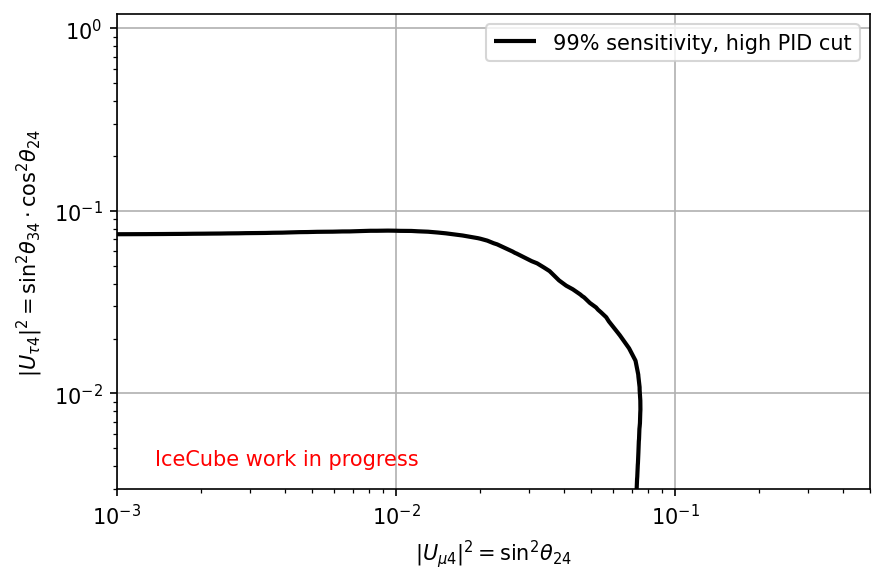

In [28]:
level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
level_99 = stats.chi2.ppf(0.99, df=2)
# cs = plot_mixing_contours(
#     results_2,
#     labels=["90% sensitivity, high PID cut"],
#     levels=[level_90],
#     colors="k",
#     linewidths=2,
#     linestyles=["-"],
#     show_triang=False
# )
cs = plot_mixing_contours(
    results_2,
    labels=["99% sensitivity, high PID cut"],
    levels=[level_99],
    colors="k",
    linewidths=2,
    linestyles=["-"],
    show_triang=False
)
plt.xlim((1e-3, 0.5))
plt.ylim((3e-3, 1.2))
plt.legend()
plt.loglog()
plt.ylabel(r"$|U_{\tau 4}|^2 = \sin^2\theta_{34}\cdot\cos^2\theta_{24}$")
plt.xlabel(r"$|U_{\mu 4}|^2 = \sin^2\theta_{24}$")
plt.text(.05, .05, "IceCube work in progress",
         color="red", transform=plt.gca().transAxes)
plt.grid()
plt.tight_layout()

In [29]:
linecoll = cs.collections[0]

In [30]:
# np.savetxt("sterile_contour_high_stats_2ch_hipid_umu4_utau4_99pct.csv", linecoll.get_segments()[0])

free fit metric val: 0.01314444134505014
minimum scan metric val: 0.011882853489816348
free fit metric val: 0.005612428977864094
minimum scan metric val: 0.005760219953717994
free fit metric val: 0.0030332491866737
minimum scan metric val: 0.0033124072798928904


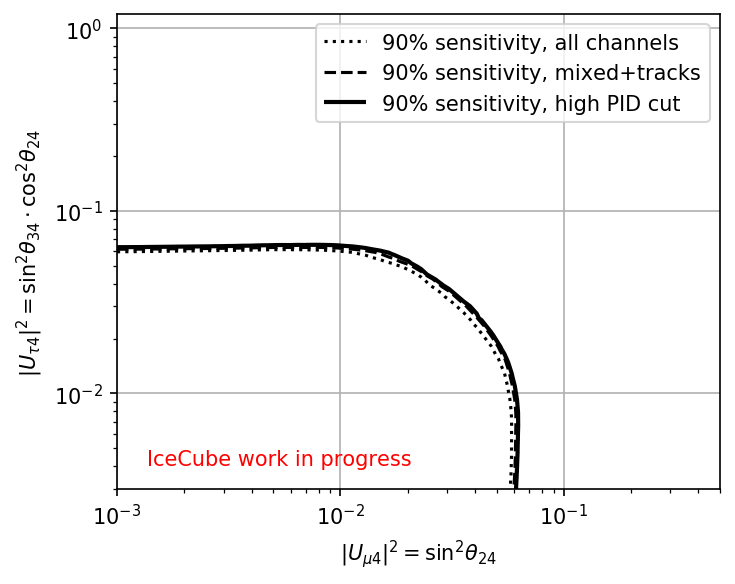

In [9]:
level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
level_99 = stats.chi2.ppf(0.99, df=2)

plt.figure(figsize=(5, 4))
plot_mixing_contours(
    results,
    labels=["90% sensitivity, all channels"],
    levels=[level_90],
    colors="k",
    linewidths=1.5,
    linestyles=[":"],
    show_triang=False
)
plot_mixing_contours(
    results_3,
    labels=["90% sensitivity, mixed+tracks"],
    levels=[level_90],
    colors="k",
    linewidths=1.5,
    linestyles=["--"],
    show_triang=False
)
plot_mixing_contours(
    results_2,
    labels=["90% sensitivity, high PID cut"],
    levels=[level_90],
    colors="k",
    linewidths=2,
    linestyles=["-"],
    show_triang=False
)
# plot_mixing_metric(results)
plt.xlim((1e-3, 0.5))
plt.ylim((3e-3, 1.2))
plt.legend()
plt.loglog()
plt.ylabel(r"$|U_{\tau 4}|^2 = \sin^2\theta_{34}\cdot\cos^2\theta_{24}$")
plt.xlabel(r"$|U_{\mu 4}|^2 = \sin^2\theta_{24}$")
plt.text(.05, .05, "IceCube work in progress",
         color="red", transform=plt.gca().transAxes)
plt.grid()
plt.tight_layout()
# plt.savefig("sensitivities/sensitivity_comparison_2ch_hipid.png", dpi=250)

free fit metric val: 0.009899905539318181
minimum scan metric val: 0.0122823922957572
[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.

[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/matplotlib/tri/triangulation.py:41: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  self.x = np.asarray(x, dtype=np.float64)

[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/matplotlib/tri/triangulation.py:42: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  self.y = np.asarray(y, dtype=np.float64)

free fit metric val: 0.009866375190511695
minimum scan metric val: 0.011194578367917271


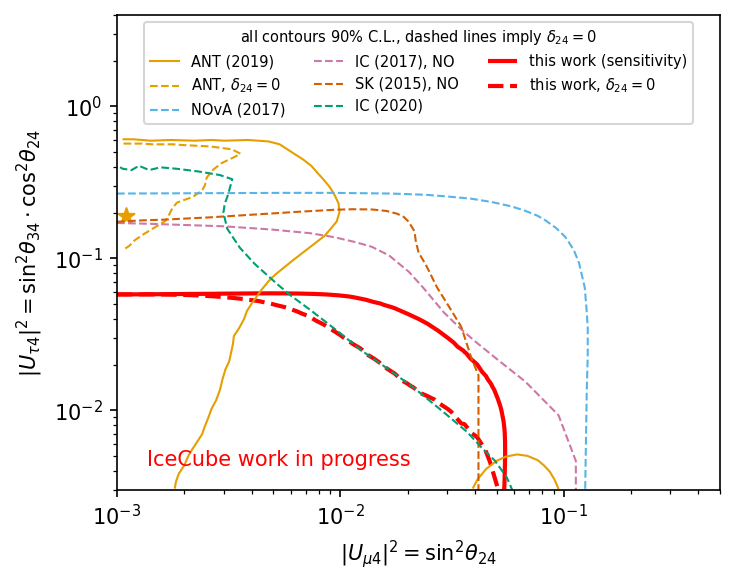

In [25]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import matplotlib.tri as tri
from matplotlib import cm
from scipy import stats

plt.figure(figsize=(5, 4))

plot_99pct = False

nova_90pct = np.loadtxt(
    "../scripts/plotting/other_contours/nova_90pct_matrix_elems.csv", delimiter=",")

ic_2017_90_pct = np.loadtxt(
    "../scripts/plotting/other_contours/IceCube_90_pct.csv", delimiter=",")
ic_2017_90_pct_io = np.loadtxt(
    "../scripts/plotting/other_contours/IceCube_90_IO.csv", delimiter=",")
sk_2015_90_pct = np.loadtxt(
    "../scripts/plotting/other_contours/SK_90_pct.csv", delimiter=",")

ic_2017_99_pct = np.loadtxt(
    "../scripts/plotting/other_contours/IC_NO_99pct.csv", delimiter=",")
ic_2017_99_pct_io = np.loadtxt(
    "../scripts/plotting/other_contours/ic_io_99pct.csv", delimiter=",")
sk_2015_99_pct = np.loadtxt(
    "../scripts/plotting/other_contours/sk_no_99pct.csv", delimiter=",")

ant_2019_90_pct = np.loadtxt(
    "../scripts/plotting/other_contours/ANTARES_90pct_free_dcp24.csv", delimiter=",")
# the little island
ant_2019_90_pct_2 = np.loadtxt(
    "../scripts/plotting/other_contours/ANTARES_90pct_free_dcp24_2.csv", delimiter=",")
ant_2019_90_pct_fixed_dcp24 = np.loadtxt(
    "../scripts/plotting/other_contours/ANTARES_90pct_fixed_dcp24.csv", delimiter=",")
ant_2019_99_pct = np.loadtxt(
    "../scripts/plotting/other_contours/ANTARES_99pct_free_dcp24.csv", delimiter=",")
meows_mixing_90pct = np.loadtxt(
    "../scripts/plotting/other_contours/meows_mixing_90pct.csv", delimiter=",")
meows_umu4, meows_utau4 = convert_matelem(
    meows_mixing_90pct[:, 0], meows_mixing_90pct[:, 1])


if plot_99pct:
    p = plt.semilogx(ant_2019_99_pct[:, 0], ant_2019_99_pct[:, 1],
                     label="ANT (2019)",
                     lw=1)
    p2 = plt.semilogx(ic_2017_99_pct[:, 0], ic_2017_99_pct[:, 1],
                      label="IC (2017)",
                      lw=1, linestyle="--")
    plt.semilogx(ic_2017_99_pct_io[:, 0], ic_2017_99_pct_io[:, 1],
                 label="IC (2017), IO",
                 lw=1, linestyle="--", color=p2[0].get_color())
    plt.semilogx(sk_2015_99_pct[:, 0], sk_2015_99_pct[:, 1],
                 label="SK (2015)",
                 lw=1, linestyle="-")

else:
    p_ant = plt.semilogx(ant_2019_90_pct[:, 0], ant_2019_90_pct[:, 1],
                     label=r"ANT (2019)",
                     lw=1, linestyle="-")
    p_ant2 = plt.semilogx(ant_2019_90_pct_2[:, 0], ant_2019_90_pct_2[:, 1],
                 color=p[0].get_color(),
                 lw=1, linestyle="-")
    p_ant_fxdcp24 = plt.semilogx(ant_2019_90_pct_fixed_dcp24[:, 0], ant_2019_90_pct_fixed_dcp24[:, 1],
                 color=p[0].get_color(),
                 label=r"ANT, $\delta_{24}=0$",
                 lw=1, linestyle="--")
    # NOvA's contours are flipped!!!
    p_nova = plt.semilogx(nova_90pct[:, 1], nova_90pct[:, 0],
                 label="NOvA (2017)",
                 lw=1, linestyle="--")
    p_ic17 = plt.semilogx(ic_2017_90_pct[:, 0], ic_2017_90_pct[:, 1],
                 label="IC (2017), NO",
                 # color="navy",
                 lw=1, linestyle="--")
    # plt.semilogx(ic_2017_90_pct_io[:, 0], ic_2017_90_pct_io[:, 1],
    #              label="IC (2017), IO",
    #              # color="navy",
    #              linestyle="--", lw=1)
    p_sk = plt.semilogx(sk_2015_90_pct[:, 0], sk_2015_90_pct[:, 1],
                 label="SK (2015), NO",
                 # color="darkslategray",
                 lw=1, linestyle="--")
    p_meows = plt.semilogx(meows_umu4, meows_utau4,
                 label="IC (2020)",
                 # color="orange",
                 lw=1, linestyle="--")

antares_bfp_th24 = 1.5  # deg
antares_bfp_th34 = 25.9  # deg
antares_bfp_umu4 = np.sin(np.deg2rad(antares_bfp_th24))**2
antares_bfp_utau4 = np.cos(np.deg2rad(antares_bfp_th24))**2 * \
    np.sin(np.deg2rad(antares_bfp_th34))**2

plt.scatter([1.1e-3], [antares_bfp_utau4], marker="*", color=p[0].get_color())



level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
level_99 = stats.chi2.ppf(0.99, df=2)

plot_mixing_contours(
    results,
    labels=["this work (sensitivity)"],
    levels=[level_99] if plot_99pct else [level_90],
    colors="r",
    linewidths=2,
    linestyles=["-"],
    show_triang=False
)

plot_mixing_contours(
    results_fixed_dcp,
    labels=[r"this work, $\delta_{24}=0$"],
    levels=[level_99] if plot_99pct else [level_90],
    colors="r",
    linewidths=2,
    linestyles=["--"],
    show_triang=False
)

plt.xlim((1e-3, 0.5))
if plot_99pct:
    plt.ylim((3e-3, 3))
else:
    plt.ylim((3e-3, 4))

plt.loglog()
# if plot_99pct:
plt.legend(fontsize=7, loc="upper center", ncol=3,
           title=(f"all contours {'99%' if plot_99pct else '90%'} C.L."
                  r", dashed lines imply $\delta_{24}=0$"),
           title_fontsize=7)
# else:
#     plt.legend(
#         [p_ant, p_nova],
#         [
#             "ANT (2019)", "NOvA (2017)"
#         ],
#         # fontsize=7, loc="upper center", ncol=3,
#         # title=(f"all contours {'99%' if plot_99pct else '90%'} C.L."
#         #        r", dashed lines imply $\delta_{24}=0^\circ$"),
#         # title_fontsize=7
#     )
plt.ylabel(r"$|U_{\tau 4}|^2 = \sin^2\theta_{34}\cdot\cos^2\theta_{24}$")
plt.xlabel(r"$|U_{\mu 4}|^2 = \sin^2\theta_{24}$")
plt.text(.05, .05, "IceCube work in progress",
         color="red", transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig("plots_vlvnt/sterile_mixing_sensitivity_90pct.pdf")
plt.savefig("plots_vlvnt/sterile_mixing_sensitivity_90pct.png", dpi=300)

## Mass splitting contours

In [3]:
from importlib import reload
reload(ps)
input_dir = "../analysis/test_hs_3D_cliprange_fix_detsys/sterile_mass_splitting/sensitivity_test/asimov/"
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/at_meows_ana1_bfp/sterile_mass_splitting/sensitivity_test/asimov/"

metadata_no_detsys, results_no_detsys = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=False,
    sin2_2theta24=True,
)

Loading parsed data from /afs/ifh.de/group/amanda/scratch/trettin/fridge3/analysis/oscnext_sterile/analysis/test_hs_3D_cliprange_fix_detsys/sterile_mass_splitting/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [8]:
# input_dir = "/lustre/fs22/group/icecube/trettin/oscNext/sterile_analysis/mass_free_th34_dcp24_48h/sterile_mass_splitting/sensitivity_test/asimov/"

# for VLVnT:
input_dir = "../analysis/test_hs_3D_cliprange/sterile_mass_splitting/sensitivity_test/asimov/"


metadata_detsys, results_detsys = ps.parse_sensitivity_test_data(
    input_dir=os.path.abspath(input_dir),
    num_files=None,
    cache_file=os.path.join(os.path.abspath(input_dir), ps.CACHE_FILE_NAME),
    reparse=False,
    angles_to_mat_elem=False,
    sin2_2theta24=True,
)

Loading parsed data from /afs/ifh.de/group/amanda/scratch/trettin/fridge3/analysis/oscnext_sterile/analysis/test_hs_3D_cliprange/sterile_mass_splitting/sensitivity_test/asimov/sensitivity_test_parsed.json
Loading JSON complete!


In [5]:
from matplotlib.colors import LogNorm, Normalize
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import matplotlib.tri as tri
from matplotlib import cm
from scipy import stats


def plot_metric_mesh(results):
    trial_keys = list(results["trials"].keys())
    # silly workaround because loading results from a file turns int keys
    # into strings...
    scan_metric = results["trials"][trial_keys[0]]["scan"]["metric_vals"]
    free_metric = results["trials"][trial_keys[0]]["free_fit"]["metric_val"]
    print(f"free fit metric val: {free_metric}")

    mask = np.isfinite(scan_metric)

    x = results["scan_grid"]["sin2_2theta24"][mask].m
    y = results["scan_grid"]["deltam41"][mask].m
    z = scan_metric[mask] - free_metric

    # making one common triangle mesh for interpolation and contours...
    # working in log-space for x because the mesh is a mess otherwise
    points = np.vstack((np.log10(x), np.log10(y))).T
    delaunay = Delaunay(points)

    xi = np.geomspace(np.min(x), np.max(x), 50)
    yi = np.geomspace(np.min(y), np.max(y), 50)

    z_interp = LinearNDInterpolator(delaunay, z)
    X, Y = np.meshgrid(xi, yi)
    # remember the Delaunay mesh was calculated on log10(x)
    zi = z_interp(np.log10(X), np.log10(Y))
    
    cnorm = LogNorm(vmin=np.nanmin(scan_metric), vmax=np.nanmax(scan_metric))
    cmap = cm.get_cmap(name='Blues', lut=None)
    
    triang = tri.Triangulation(np.log10(x), np.log10(y), delaunay.simplices)
    triang.x = 10 ** triang.x
    triang.y = 10 ** triang.y

    p = plt.pcolormesh(X, Y, zi, cmap=cmap, norm=cnorm)
    plt.triplot(triang, lw=0.1, color='white')
    return p

def plot_param_mesh(results, param):
    trial_keys = list(results["trials"].keys())
    # silly workaround because loading results from a file turns int keys
    # into strings...
    scan_values = results["trials"][trial_keys[0]]["scan"]["param_fit_vals"][param].m
    true_value = results["truth_params"][param].m

    mask = np.isfinite(scan_values)

    x = results["scan_grid"]["sin2_2theta24"][mask].m
    y = results["scan_grid"]["deltam41"][mask].m
    z = scan_values[mask] - true_value

    # making one common triangle mesh for interpolation and contours...
    # working in log-space for x because the mesh is a mess otherwise
    points = np.vstack((np.log10(x), np.log10(y))).T
    delaunay = Delaunay(points)

    xi = np.geomspace(np.min(x), np.max(x), 50)
    yi = np.geomspace(np.min(y), np.max(y), 50)

    z_interp = LinearNDInterpolator(delaunay, z)
    X, Y = np.meshgrid(xi, yi)
    # remember the Delaunay mesh was calculated on log10(x)
    zi = z_interp(np.log10(X), np.log10(Y))
    
    cnorm = Normalize(vmin=-np.nanmax(np.abs(z)),
                      vmax= np.nanmax(np.abs(z)))
    cmap = cm.get_cmap(name='coolwarm', lut=None)
    
    triang = tri.Triangulation(np.log10(x), np.log10(y), delaunay.simplices)
    triang.x = 10 ** triang.x
    triang.y = 10 ** triang.y

    p = plt.pcolormesh(X, Y, zi, cmap=cmap, norm=cnorm)
    plt.triplot(triang, lw=0.1, color='white')
    return p

def plot_metric_contours(results, **tricontour_kw):
    trial_keys = list(results["trials"].keys())
    # silly workaround because loading results from a file turns int keys
    # into strings...
    scan_metric = results["trials"][trial_keys[0]]["scan"]["metric_vals"]
    free_metric = results["trials"][trial_keys[0]]["free_fit"]["metric_val"]
    print(f"free fit metric val: {free_metric}")

    mask = np.isfinite(scan_metric)

    x = results["scan_grid"]["sin2_2theta24"][mask].m
    y = results["scan_grid"]["deltam41"][mask].m
    z = scan_metric[mask] - free_metric

    # making one common triangle mesh for interpolation and contours...
    # working in log-space for x because the mesh is a mess otherwise
    points = np.vstack((np.log10(x), np.log10(y))).T
    delaunay = Delaunay(points)

    # a different object with the same triangles to make contours
    triang = tri.Triangulation(np.log10(x), np.log10(y), delaunay.simplices)
    # butter smooth contours!
    refiner = tri.UniformTriRefiner(triang)
    tri_refi, z_refi = refiner.refine_field(z, subdiv=1)
    # from log to lin
    tri_refi.x = 10 ** tri_refi.x
    tri_refi.y = 10 ** tri_refi.y

    CS = plt.tricontour(tri_refi, z_refi, **tricontour_kw)
    return CS

free fit metric val: 0.010328890791225568
[ WARNING] /afs/ifh.de/group/amanda/scratch/trettin/fridge3/pyenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

free fit metric val: 0.010328890791225568


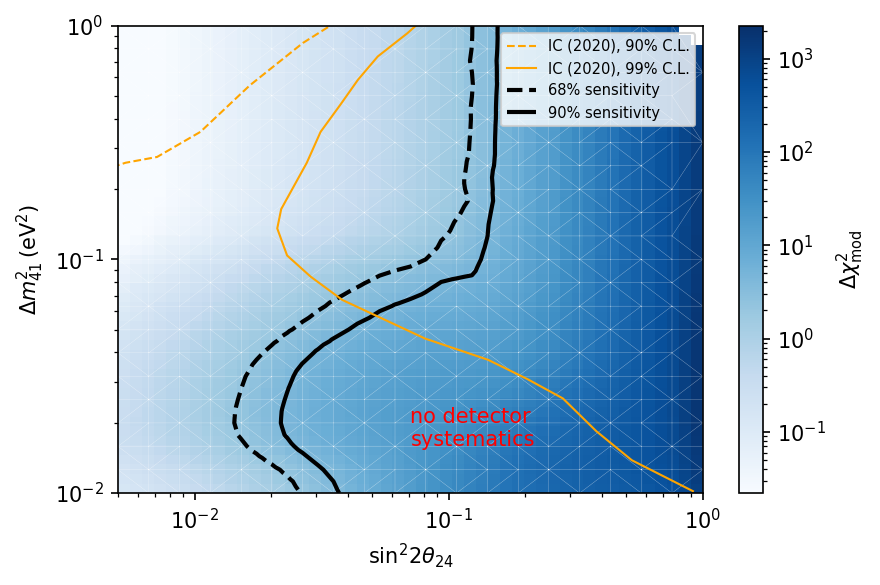

In [9]:
from matplotlib.colors import LogNorm, Normalize
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import matplotlib.tri as tri
from matplotlib import cm
from scipy import stats

plt.figure(figsize=(6, 4))
  
meows_dm41_90pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_90pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_90pct[:, 0], meows_dm41_90pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 90% C.L.", color="orange", lw=1, linestyle="--")

meows_dm41_99pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_99pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_99pct[:, 0], meows_dm41_99pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 99% C.L.", color="orange", lw=1)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)

p = plot_metric_mesh(results_no_detsys)
CS = plot_metric_contours(results_no_detsys, levels=[level_68, level_90], colors="k",
                          linewidths=2, linestyles=["--", "-"])

labels = ["68% sensitivity", "90% sensitivity"]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
    
x = results_no_detsys["param_space"]["sin2_2theta24"].m
y = results_no_detsys["param_space"]["deltam41"].m
plt.xlim((min(x), max(x)))
plt.ylim((min(y), max(y)))
cbar = plt.colorbar(p)
cbar.set_label(r"$\Delta\chi^2_{\mathrm{mod}}$")
plt.loglog()
plt.legend(fontsize=7, loc="upper right")
plt.ylabel(r"$\Delta m^2_{41}\,\mathrm{(eV^2)}$")
plt.xlabel(r"$\sin^2 2 \theta_{24}$")
plt.text(.5, .1, "no detector\nsystematics", color="red", transform=plt.gca().transAxes)
plt.tight_layout()
# plt.savefig("sterile_dm41_sens_free_dcp42_with_meows.pdf")
# plt.savefig("sterile_dm41_sens_free_dcp42_with_meows.png", dpi=250)

free fit metric val: 0.010120678436977079


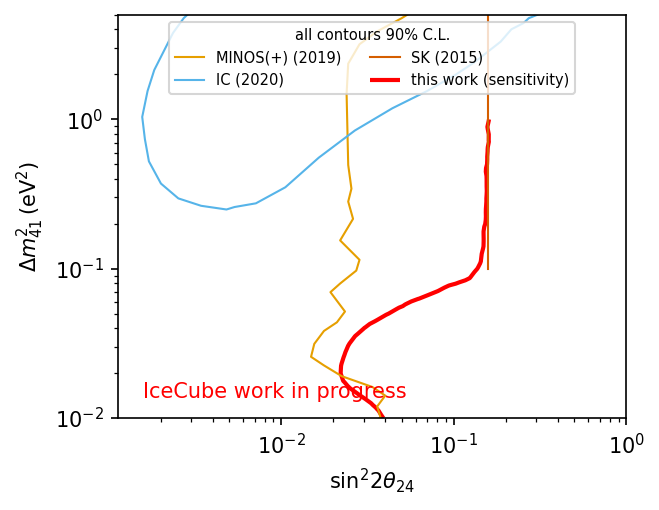

In [16]:
plt.figure(figsize=(4.5, 3.5))

minos_90pct = np.loadtxt("../scripts/plotting/other_contours/minos+_90pct_sin2_theta24_dm41.csv", delimiter=",")
minos_th24 = np.arcsin(np.sqrt(minos_90pct[:, 0]))
minos_sin2_2th24 = np.sin(2*minos_th24)**2
minos_dm41 = minos_90pct[:, 1]
plt.loglog(minos_sin2_2th24, minos_dm41,
           label="MINOS(+) (2019)",
           #color="chocolate",
           lw=1, linestyle="-")


meows_dm41_90pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_90pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_90pct[:, 0], meows_dm41_90pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41,
           label="IC (2020)",
           #color="orange",
           lw=1, linestyle="-")
sk_sin2_th24 = 0.041
sk_th24 = np.arcsin(np.sqrt(sk_sin2_th24))
sk_sin2_2th24 = np.sin(2*sk_th24)**2
plt.plot([sk_sin2_2th24, sk_sin2_2th24], [0.1, 100],
         #color="darkslategray",
         lw=1, label="SK (2015)")
# meows_dm41_99pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_99pct.csv", delimiter=",")
# meows_sin2_2th24, meows_dm41 = (meows_dm41_99pct[:, 0], meows_dm41_99pct[:, 1])
# plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 99% C.L.", color="orange", lw=1)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
level_99 = stats.chi2.ppf(0.99, df=2)

#p = plot_metric_mesh(results_detsys)
CS = plot_metric_contours(
    results_detsys,
    levels=[
      # level_68,
      level_90,
      # level_99
    ],
    colors="r",
    linewidths=2,
    linestyles=[
      # ":",
      # "--",
      "-"
    ]
)

labels = [
    # "68% sensitivity",
    # "90% sensitivity",
    # "99% sensitivity"
    "this work (sensitivity)"
]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

x = results_detsys["param_space"]["sin2_2theta24"].m
y = results_detsys["param_space"]["deltam41"].m
#plt.xlim((min(x), max(x)))
#plt.ylim((min(y), max(y)))
plt.ylim((1e-2, 5))
# cbar = plt.colorbar(p)
# cbar.set_label(r"$\Delta\chi^2_{\mathrm{mod}}$")
plt.loglog()
plt.legend(fontsize=7, loc="upper center", ncol=2, title="all contours 90% C.L.", title_fontsize=7)
plt.ylabel(r"$\Delta m^2_{41}\,\mathrm{(eV^2)}$")
plt.xlabel(r"$\sin^2 2 \theta_{24}$")
plt.text(.05, .05, "IceCube work in progress", color="red", transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig("plots_vlvnt/sterile_dm41_sens_increased_range.pdf")
plt.savefig("plots_vlvnt/sterile_dm41_sens_increased_range.png", dpi=250)

free fit metric val: 0.010328890791225568
free fit metric val: 0.010120678436977079


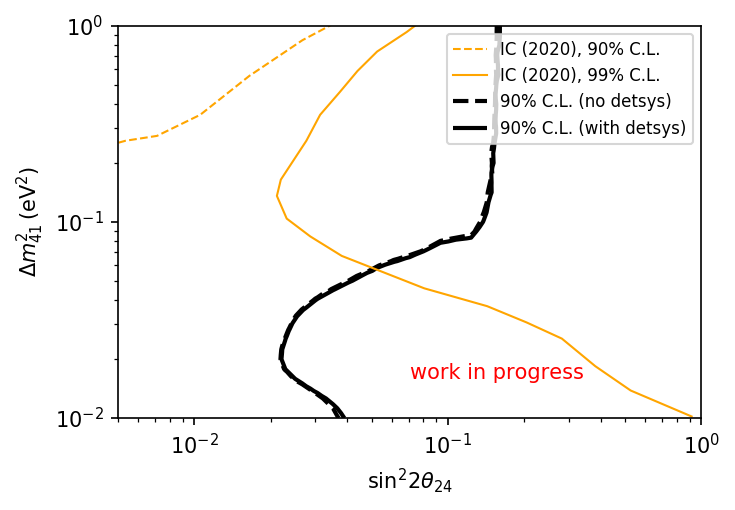

In [9]:
plt.figure(figsize=(5,3.5))

meows_dm41_90pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_90pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_90pct[:, 0], meows_dm41_90pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 90% C.L.", color="orange", lw=1, linestyle="--")

meows_dm41_99pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_99pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_99pct[:, 0], meows_dm41_99pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 99% C.L.", color="orange", lw=1)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)

CS = plot_metric_contours(results_no_detsys, levels=[level_90], colors="k",
                          linewidths=2, linestyles=["--"])

labels = ["90% C.L. (no detsys)"]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

CS = plot_metric_contours(results_detsys, levels=[level_90], colors="k",
                          linewidths=2, linestyles=["-"])

labels = ["90% C.L. (with detsys)"]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

x = results_detsys["param_space"]["sin2_2theta24"].m
y = results_detsys["param_space"]["deltam41"].m
plt.xlim((min(x), max(x)))
plt.ylim((min(y), max(y)))
plt.loglog()
plt.legend(fontsize=8, loc="upper right")
plt.ylabel(r"$\Delta m^2_{41}\,\mathrm{(eV^2)}$")
plt.xlabel(r"$\sin^2 2 \theta_{24}$")
plt.text(.5, .1, "work in progress", color="red", transform=plt.gca().transAxes)
plt.tight_layout()
# plt.savefig("sterile_dm41_sens_detsys_with_meows.pdf")
# plt.savefig("sterile_dm41_sens_detsys_with_meows.png", dpi=250)

free fit metric val: 0.010328890791225568
free fit metric val: 0.010120678436977079


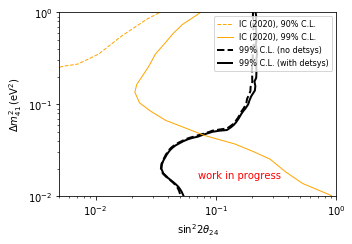

In [17]:
plt.figure(figsize=(5,3.5))

meows_dm41_90pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_90pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_90pct[:, 0], meows_dm41_90pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 90% C.L.", color="orange", lw=1, linestyle="--")

meows_dm41_99pct = np.loadtxt("../scripts/plotting/other_contours/meows_dm41_99pct.csv", delimiter=",")
meows_sin2_2th24, meows_dm41 = (meows_dm41_99pct[:, 0], meows_dm41_99pct[:, 1])
plt.loglog(meows_sin2_2th24, meows_dm41, label="IC (2020), 99% C.L.", color="orange", lw=1)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
level_99 = stats.chi2.ppf(0.99, df=2)

CS = plot_metric_contours(results_no_detsys, levels=[level_99], colors="k",
                          linewidths=2, linestyles=["--"])

labels = ["99% C.L. (no detsys)"]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

CS = plot_metric_contours(results_detsys, levels=[level_99], colors="k",
                          linewidths=2, linestyles=["-"])

labels = ["99% C.L. (with detsys)"]
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

x = results_detsys["param_space"]["sin2_2theta24"].m
y = results_detsys["param_space"]["deltam41"].m
plt.xlim((min(x), max(x)))
plt.ylim((min(y), max(y)))
plt.loglog()
plt.legend(fontsize=8, loc="upper right")
plt.ylabel(r"$\Delta m^2_{41}\,\mathrm{(eV^2)}$")
plt.xlabel(r"$\sin^2 2 \theta_{24}$")
plt.text(.5, .1, "work in progress", color="red", transform=plt.gca().transAxes)
plt.tight_layout()

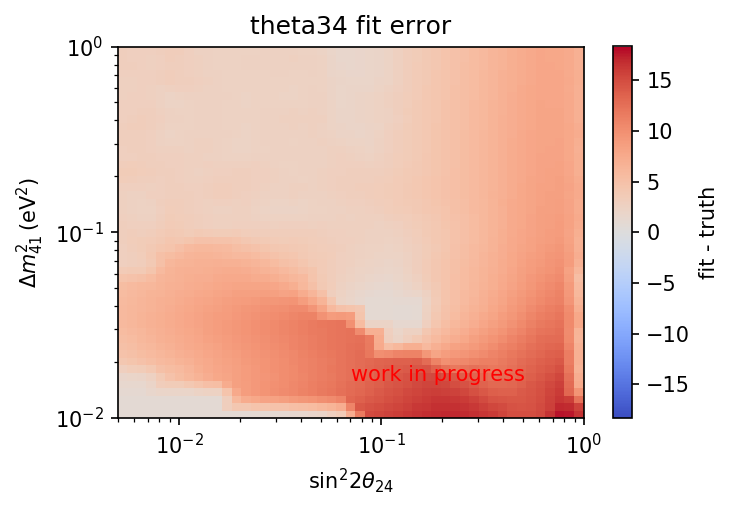

In [11]:
param = "theta34"

plt.figure(figsize=(5,3.5))
p = plot_param_mesh(results_detsys, param)
x = results_detsys["param_space"]["sin2_2theta24"].m
y = results_detsys["param_space"]["deltam41"].m
plt.xlim((min(x), max(x)))
plt.ylim((min(y), max(y)))
cbar = plt.colorbar(p)
cbar.set_label("fit - truth")
plt.title(f"{param} fit error")
plt.loglog()
plt.ylabel(r"$\Delta m^2_{41}\,\mathrm{(eV^2)}$")
plt.xlabel(r"$\sin^2 2 \theta_{24}$")
plt.text(.5, .1, "work in progress", color="red", transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig(f"mass_analysis_free_theta34_deltacp24/{param}_after_scan.png", dpi=250)

In [32]:
results_detsys["truth_params"].free

name,value,nominal_value,range,prior,units,is_fixed
delta_index,0,0,"[-0.5, 0.5]",+/- 0.1,dimensionless,False
barr_af_Pi,0,0,"[-3.15, 3.15]",+/- 0.63,dimensionless,False
barr_g_Pi,0,0,"[-1.5, 1.5]",+/- 0.3,dimensionless,False
barr_h_Pi,0,0,"[-0.75, 0.75]",+/- 0.15,dimensionless,False
barr_w_K,0,0,"[-2.0, 2.0]",+/- 0.4,dimensionless,False
barr_y_K,0,0,"[-1.5, 1.5]",+/- 0.3,dimensionless,False
barr_w_antiK,0,0,"[-2.0, 2.0]",+/- 0.4,dimensionless,False
sin2_2theta24,0,0,"[0.0, 1.4997597826618576e-32]",,dimensionless,False
theta34,0,0,"[0, 90]",,degree,False
theta23,45.3637,49.7,"[0, 90]",uniform,degree,False
